# **Machine learning models for customers churn prediction**

Khanh Tran

## Load dataset

In [29]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Read dataset
churn_df = pd.read_csv('C:/KhanhTV5/PyVirEnv/Data-Science-Concepts/MachineLearning/data/telecom_customer_churn.csv')
churn_df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [58]:
churn_df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

In [31]:
churn_df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

<AxesSubplot: xlabel='Customer Status', ylabel='count'>

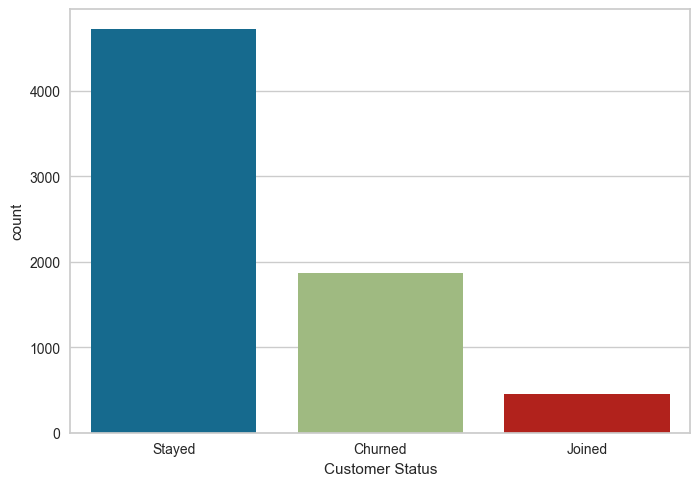

In [32]:
y = churn_df['Customer Status']
sns.countplot(data = churn_df, x = churn_df['Customer Status'])

In [33]:
drop_cols = ['Customer ID', 'Churn Category','Churn Reason', \
             'City', 'Zip Code', 'Latitude', 'Longitude']

models_list = ['lr', 'knn', 'svm', 'nb', 'dt', 'rf', 'xgboost', 'lightgbm']

from pycaret.classification import *
exp_1 = setup(data = churn_df,  target = 'Customer Status', ignore_features = drop_cols)
top5 = compare_models(include=models_list, n_select = 5)
stacker = stack_models(top5)

,Description,Value
0,Session id,4358
1,Target,Customer Status
2,Target type,Multiclass
3,Target mapping,"Churned: 0, Joined: 1, Stayed: 2"
4,Original data shape,"(7043, 38)"
5,Transformed data shape,"(7043, 42)"
6,Transformed train set shape,"(4930, 42)"
7,Transformed test set shape,"(2113, 42)"
8,Ignore features,7
9,Ordinal features,14


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8367,0.9322,0.8367,0.8324,0.8335,0.6487,0.6501,0.9120
rf,Random Forest Classifier,0.8357,0.9262,0.8357,0.8298,0.8306,0.6410,0.6441,0.4430
xgboost,Extreme Gradient Boosting,0.8306,0.9297,0.8306,0.8256,0.8269,0.6346,0.6363,1.1310
lr,Logistic Regression,0.7992,0.9053,0.7992,0.7996,0.7987,0.5769,0.5776,1.7270
dt,Decision Tree Classifier,0.7751,0.7812,0.7751,0.7778,0.7759,0.5305,0.5309,0.1690
knn,K Neighbors Classifier,0.7481,0.7942,0.7481,0.7283,0.7336,0.4347,0.4411,0.2400
nb,Naive Bayes,0.7227,0.8664,0.7227,0.7749,0.7375,0.4810,0.4918,0.1560
svm,SVM - Linear Kernel,0.6604,0.0000,0.6604,0.7279,0.6380,0.3290,0.3805,0.2150


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8540,0.9151,0.8540,0.8543,0.8528,0.6847,0.6854
1,0.8235,0.9220,0.8235,0.8232,0.8229,0.6272,0.6276
2,0.8357,0.9347,0.8357,0.8378,0.8359,0.6536,0.6540
3,0.8661,0.9537,0.8661,0.8648,0.8650,0.7160,0.7162
4,0.8195,0.9401,0.8195,0.8136,0.8161,0.6137,0.6142
5,0.8296,0.9265,0.8296,0.8223,0.8252,0.6322,0.6333
6,0.8195,0.9370,0.8195,0.8171,0.8151,0.6161,0.6173
7,0.8215,0.8884,0.8215,0.8189,0.8196,0.6197,0.6200
8,0.8195,0.8953,0.8195,0.8132,0.8154,0.6106,0.6122


In [46]:
stacker

StackingClassifier(cv=5,
                   estimators=[('Light Gradient Boosting Machine',
                                LGBMClassifier(boosting_type='gbdt',
                                               class_weight=None,
                                               colsample_bytree=1.0,
                                               importance_type='split',
                                               learning_rate=0.1, max_depth=-1,
                                               min_child_samples=20,
                                               min_child_weight=0.001,
                                               min_split_gain=0.0,
                                               n_estimators=100, n_jobs=-1,
                                               num_leaves=31, objective=None,
                                               random_state=4358, reg_alpha=0.0,
                                               r...
                                                       min_weight_fraction_leaf=0.0,
                                                       random_state=4358,
                                                       splitter='best'))],
                   final_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=1000,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=4358,
                                                      solver='lbfgs',
                                                      tol=0.0001, verbose=0,
                                                      warm_start=False),
                   n_jobs=-1, passthrough=True, stack_method='auto', verbose=0)

In [37]:
top7 = compare_models(include=models_list, n_select = 7)
stacker1 = stack_models(top7)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8367,0.9322,0.8367,0.8324,0.8335,0.6487,0.6501,1.1160
rf,Random Forest Classifier,0.8357,0.9262,0.8357,0.8298,0.8306,0.6410,0.6441,0.4410
xgboost,Extreme Gradient Boosting,0.8306,0.9297,0.8306,0.8256,0.8269,0.6346,0.6363,1.1750
lr,Logistic Regression,0.7992,0.9053,0.7992,0.7996,0.7987,0.5769,0.5776,1.9230
dt,Decision Tree Classifier,0.7751,0.7812,0.7751,0.7778,0.7759,0.5305,0.5309,0.2000
knn,K Neighbors Classifier,0.7481,0.7942,0.7481,0.7283,0.7336,0.4347,0.4411,0.2510
nb,Naive Bayes,0.7227,0.8664,0.7227,0.7749,0.7375,0.4810,0.4918,0.1570
svm,SVM - Linear Kernel,0.6604,0.0000,0.6604,0.7279,0.6380,0.3290,0.3805,0.2070


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8357,0.9093,0.8357,0.8360,0.8337,0.6456,0.6463
1,0.8479,0.9332,0.8479,0.8459,0.8468,0.6767,0.6769
2,0.8235,0.9303,0.8235,0.8244,0.8224,0.6237,0.6242
3,0.8702,0.9569,0.8702,0.8702,0.8701,0.7268,0.7268
4,0.8276,0.9416,0.8276,0.8226,0.8244,0.6301,0.6307
5,0.8276,0.9244,0.8276,0.8195,0.8226,0.6268,0.6281
6,0.8235,0.9372,0.8235,0.8245,0.8213,0.6279,0.6291
7,0.8174,0.8997,0.8174,0.8139,0.8145,0.6083,0.6089
8,0.8256,0.8975,0.8256,0.8202,0.8221,0.6237,0.6251


In [ ]:
exp_2 = setup(data = churn_df,  target = 'Customer Status', ignore_features = drop_cols, session_id = 6765, fix_imbalance=True)
models2 = compare_models(include=models_list)
stack_models2 = stack_models(models)

### Using lazypredict library

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None,classifiers = 'all')
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

In [ ]:
print(models)

In [50]:
from pycaret.datasets import get_data
juice = get_data('juice')
from pycaret.classification import *
exp_name = setup(data = juice,  target = 'Purchase')
top3 = compare_models(n_select = 3)
tuned_top3 = [tune_model(i) for i in top3]

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


,Description,Value
0,Session id,199
1,Target,Purchase
2,Target type,Binary
3,Target mapping,"CH: 0, MM: 1"
4,Original data shape,"(1070, 19)"
5,Transformed data shape,"(1070, 19)"
6,Transformed train set shape,"(749, 19)"
7,Transformed test set shape,"(321, 19)"
8,Ordinal features,1
9,Numeric features,17


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8358,0.9015,0.8358,0.8371,0.8350,0.6527,0.6551,0.0410
ada,Ada Boost Classifier,0.8290,0.8711,0.8290,0.8293,0.8277,0.6363,0.6388,0.0770
ridge,Ridge Classifier,0.8277,0.0000,0.8277,0.8291,0.8270,0.6362,0.6384,0.0410
lr,Logistic Regression,0.8264,0.8986,0.8264,0.8279,0.8243,0.6292,0.6337,0.0960
gbc,Gradient Boosting Classifier,0.8224,0.8969,0.8224,0.8241,0.8211,0.6232,0.6267,0.0980
catboost,CatBoost Classifier,0.8224,0.8958,0.8224,0.8237,0.8216,0.6249,0.6272,2.3740
rf,Random Forest Classifier,0.8117,0.8826,0.8117,0.8132,0.8106,0.6016,0.6045,0.1480
lightgbm,Light Gradient Boosting Machine,0.8011,0.8854,0.8011,0.8035,0.8004,0.5808,0.5838,0.3010
et,Extra Trees Classifier,0.7984,0.8643,0.7984,0.7980,0.7975,0.5734,0.5744,0.1390
xgboost,Extreme Gradient Boosting,0.7984,0.8885,0.7984,0.8007,0.7974,0.5739,0.5775,0.1300


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8800,0.9408,0.8800,0.8847,0.8809,0.7517,0.7543
1,0.8133,0.9115,0.8133,0.8119,0.8120,0.6014,0.6023
2,0.8000,0.8598,0.8000,0.7989,0.7993,0.5756,0.5759
3,0.8400,0.9168,0.8400,0.8546,0.8419,0.6751,0.6842
4,0.8800,0.9228,0.8800,0.8810,0.8804,0.7486,0.7489
5,0.8133,0.8906,0.8133,0.8119,0.8120,0.6014,0.6023
6,0.8000,0.8583,0.8000,0.7989,0.7993,0.5756,0.5759
7,0.8267,0.9311,0.8267,0.8259,0.8262,0.6369,0.6371
8,0.8133,0.8830,0.8133,0.8129,0.8106,0.6023,0.6062


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8533,0.9280,0.8533,0.8584,0.8545,0.6966,0.6990
1,0.8000,0.9160,0.8000,0.7992,0.7957,0.5645,0.5705
2,0.7867,0.8347,0.7867,0.7867,0.7867,0.5502,0.5502
3,0.8667,0.9247,0.8667,0.8742,0.8679,0.7259,0.7303
4,0.8400,0.9160,0.8400,0.8400,0.8400,0.6627,0.6627
5,0.8267,0.9093,0.8267,0.8273,0.8230,0.6225,0.6292
6,0.8267,0.8759,0.8267,0.8273,0.8230,0.6225,0.6292
7,0.8400,0.8956,0.8400,0.8405,0.8377,0.6591,0.6634
8,0.8267,0.8730,0.8267,0.8259,0.8249,0.6328,0.6351


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8933,0.0000,0.8933,0.8958,0.8939,0.7779,0.7791
1,0.8400,0.0000,0.8400,0.8400,0.8374,0.6538,0.6582
2,0.8267,0.0000,0.8267,0.8258,0.8261,0.6322,0.6325
3,0.8267,0.0000,0.8267,0.8378,0.8286,0.6458,0.6519
4,0.8800,0.0000,0.8800,0.8810,0.8804,0.7486,0.7489
5,0.8000,0.0000,0.8000,0.7981,0.7977,0.5701,0.5722
6,0.8000,0.0000,0.8000,0.7989,0.7993,0.5756,0.5759
7,0.8400,0.0000,0.8400,0.8392,0.8390,0.6629,0.6640
8,0.8000,0.0000,0.8000,0.8000,0.7962,0.5714,0.5774


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [51]:
tuned_top3

[LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                            priors=None, shrinkage=None, solver='svd',
                            store_covariance=False, tol=0.0001),
 AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                    estimator=None, learning_rate=1.0, n_estimators=50,
                    random_state=199),
 RidgeClassifier(alpha=0.36, class_weight=None, copy_X=True, fit_intercept=False,
                 max_iter=None, positive=False, random_state=199, solver='auto',
                 tol=0.0001)]

In [54]:
blender = blend_models(tuned_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8800,0.0000,0.8800,0.8847,0.8809,0.7517,0.7543
1,0.8267,0.0000,0.8267,0.8273,0.8230,0.6225,0.6292
2,0.8400,0.0000,0.8400,0.8400,0.8400,0.6627,0.6627
3,0.8533,0.0000,0.8533,0.8641,0.8549,0.7003,0.7069
4,0.8533,0.0000,0.8533,0.8545,0.8538,0.6927,0.6930
5,0.8400,0.0000,0.8400,0.8390,0.8388,0.6583,0.6594
6,0.7867,0.0000,0.7867,0.7848,0.7851,0.5444,0.5453
7,0.8533,0.0000,0.8533,0.8532,0.8518,0.6893,0.6918
8,0.8267,0.0000,0.8267,0.8280,0.8233,0.6286,0.6351


In [55]:
stacker = stack_models(tuned_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8933,0.9468,0.8933,0.8958,0.8939,0.7779,0.7791
1,0.8267,0.9153,0.8267,0.8255,0.8247,0.6274,0.6298
2,0.8267,0.8658,0.8267,0.8255,0.8247,0.6274,0.6298
3,0.8667,0.9220,0.8667,0.8810,0.8683,0.7292,0.7391
4,0.8533,0.9093,0.8533,0.8527,0.8528,0.6888,0.6891
5,0.8000,0.9010,0.8000,0.8024,0.7933,0.5587,0.5709
6,0.7867,0.8508,0.7867,0.7848,0.7851,0.5444,0.5453
7,0.8400,0.9319,0.8400,0.8405,0.8377,0.6591,0.6634
8,0.8000,0.8830,0.8000,0.8000,0.7962,0.5714,0.5774


In [56]:
best_auc_model = automl(optimize = 'AUC')

In [57]:
best_auc_model

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

In [59]:
svm = create_model('svm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4000,0.0000,0.4000,0.7649,0.2438,0.0169,0.0923
1,0.4400,0.0000,0.4400,0.7713,0.3224,0.0686,0.1885
2,0.4933,0.0000,0.4933,0.4057,0.4344,-0.1895,-0.2189
3,0.5333,0.0000,0.5333,0.7056,0.4960,0.1784,0.2601
4,0.4133,0.0000,0.4133,0.7669,0.2710,0.0340,0.1314
5,0.6133,0.0000,0.6133,0.3762,0.4663,0.0000,0.0000
6,0.4000,0.0000,0.4000,0.7649,0.2438,0.0169,0.0923
7,0.4133,0.0000,0.4133,0.7622,0.2569,0.0179,0.0949
8,0.5467,0.0000,0.5467,0.5681,0.5512,0.0957,0.0980
